In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
# Features and label
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Train and test
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Fit to model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Cross Validation Score - Accuracy

In [5]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_validation_5f_score = np.mean(cross_val_score(clf, X, y))

In [6]:
print(f'Accuracy: {cross_validation_5f_score*100:.2f}%')

Accuracy: 83.82%


#### ROC
**Area under the receiver operating chracteristic cure (AUC/ROC)**
* Area Under Curve (AUC)
* ROC Curve

ROC curve are comparison of true positive and false positive rate
* True Positive model predicts 1 when truth is 1
* False Positive model predicts 1 when truth is 0
* True Negative model predicts 0 when truth is 0
* False Negative model predicts 0 when truth is 1

In [7]:
from sklearn.metrics import roc_curve

# Make predictions with probs
y_probs = clf.predict_proba(X_test)
y_probs[:2]

array([[0.95, 0.05],
       [0.38, 0.62]])

In [8]:
y_proba_positive = y_probs[:, 1]
y_proba_positive

array([0.05, 0.62, 0.55, 0.14, 0.79, 0.84, 0.64, 0.05, 0.04, 0.47, 0.81,
       0.36, 0.93, 0.13, 0.96, 0.97, 0.99, 0.08, 0.02, 0.06, 0.46, 0.1 ,
       0.65, 0.77, 0.65, 0.66, 0.79, 0.7 , 0.1 , 0.88, 0.09, 0.09, 0.03,
       0.33, 0.53, 0.19, 0.59, 0.78, 0.59, 0.87, 0.81, 0.74, 0.84, 0.66,
       0.71, 0.24, 0.55, 0.99, 0.16, 0.06, 0.35, 0.19, 0.85, 0.66, 0.24,
       0.1 , 0.41, 0.94, 0.14, 0.  , 0.19])

In [9]:
# Calculate FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_positive)

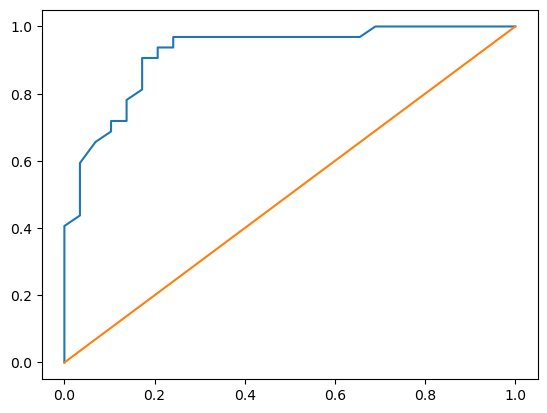

In [10]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

In [11]:
clf.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test, clf.predict(X_test))

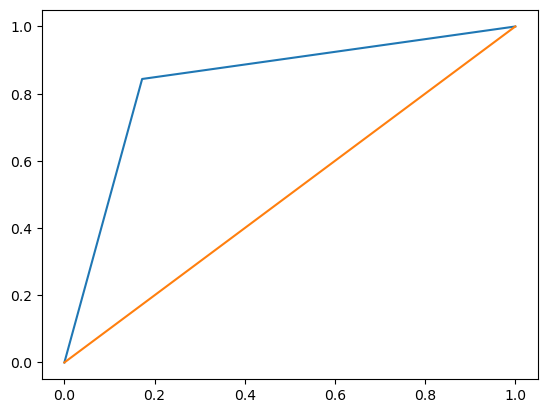

In [12]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

In [13]:
import matplotlib.pyplot as plt
def roc_curve_plot(fpr, tpr):
    fig, ax = plt.subplots(figsize=(10,5))
    
    ax.plot(fpr, tpr, color='orange', label='ROC')
    ax.plot([0,1], [0,1], linestyle='--', label='Guessing', color='darkblue')
    ax.set(title='ROC Curve', 
           xlabel='False Positive Rate', 
           ylabel='True Positive Rate')
    plt.legend()
    
    plt.show()

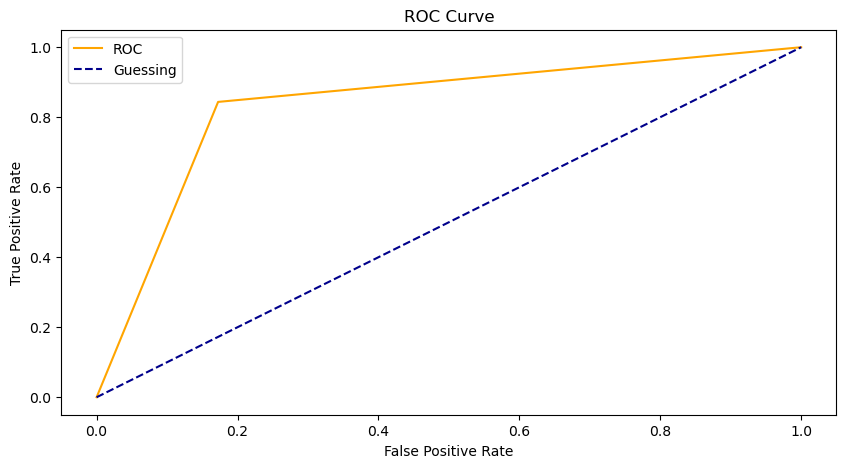

In [14]:
roc_curve_plot(fpr, tpr)

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_proba_positive)

0.9202586206896551

In [22]:

def print_metrics_clf(X, y, X_train, X_test, y_train, y_test, classifier):
    
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import roc_curve, roc_auc_score
    import matplotlib.pyplot as plt

    print('Accuracy')
    print('----------------------')
    print(f'Train data score: {classifier.score(X_train, y_train)}')
    print(f'Test data score: {classifier.score(X_test, y_test)}')
    print()
    
    print('Cross Validation Score')
    print('----------------------')
    val_score = cross_val_score(classifier, X, y)
    print(f'Cross Validation Scores: {val_score}')
    print(f'Mean Cross Valication Score: {val_score.mean()}')
    print()
    
    print('ROC Curve')
    print('----------------------')
    y_probs = classifier.predict_proba(X_test)
    y_probs_positive = y_probs[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(fpr, tpr, color='darkblue', label='ROC Curve')
    ax.plot([0,1],[0,1], linestyle='dashdot', label='Guess', color='red')
    ax.set(title='ROC Curve', xlabel='False Positive Rate', ylabel='True Positive Rate')
    plt.legend()
    plt.show()

Accuracy
----------------------
Train data score: 1.0
Test data score: 0.8360655737704918

Cross Validation Score
----------------------
Cross Validation Scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean Cross Valication Score: 0.8381967213114756

ROC Curve
----------------------


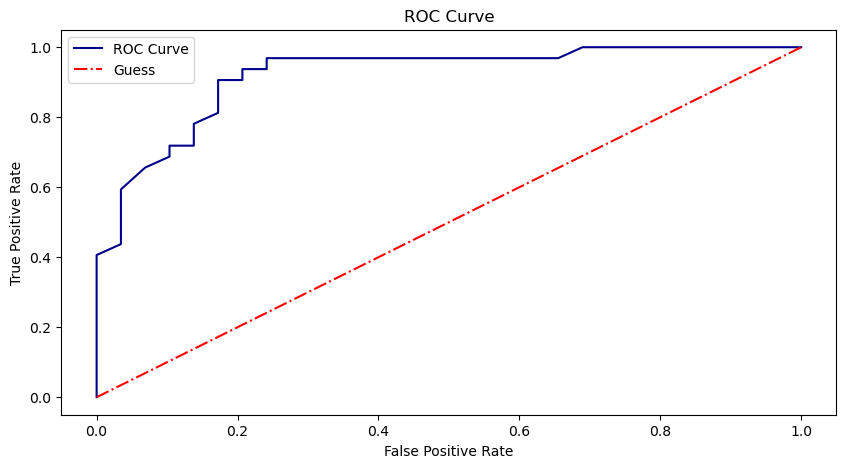

In [23]:
print_metrics_clf(X, y, X_train, X_test, y_train, y_test, clf)